Berikut adalah tahapan membuat model linear dengan dataset "contoh.csv" dijelaskan secara konsep tanpa kode:

1. **Persiapan Data**:
- Langkah pertama adalah mengimpor dataset "contoh.csv" ke dalam lingkungan pemrograman, seperti Python. Dataset ini terdiri dari beberapa fitur yang akan digunakan untuk membangun model. Dalam proses ini, penting untuk memastikan bahwa dataset sudah terbaca dengan benar.

2. **Eksplorasi Data**:
- Eksplorasi data bertujuan untuk memahami struktur dataset. Ini termasuk melihat sebagian data, memeriksa tipe data setiap kolom, serta melakukan deskripsi statistik dasar seperti nilai rata-rata, median, standar deviasi, dan nilai minimum-maksimum.
- Selain itu, penting untuk memahami kolom mana yang merupakan **target variabel** (yaitu nilai yang ingin diprediksi), dan kolom mana yang merupakan **fitur** (yaitu variabel independen yang digunakan untuk membuat prediksi).

3. **Pra-pemrosesan Data**:
- Dalam tahap ini, hal pertama yang dilakukan adalah menangani nilai yang hilang (missing values). Bisa dengan menghapus baris yang mengandung missing values atau mengganti missing values dengan nilai tertentu (misalnya rata-rata atau median).
- Jika dataset mengandung data kategorikal (misalnya, kolom dengan teks), maka data tersebut perlu diubah menjadi bentuk numerik, sehingga bisa diproses oleh model linear. Metode yang sering digunakan adalah **One-Hot Encoding**, di mana setiap kategori diubah menjadi kolom terpisah dengan nilai biner (0 atau 1).

4. **Pisahkan Fitur dan Target Variabel**:
- Dalam langkah ini, dataset dipecah menjadi dua bagian: **fitur (X)** dan **target (y)**. Fitur adalah variabel independen yang akan digunakan untuk membuat prediksi, sedangkan target adalah variabel dependen yang ingin diprediksi.

5. **Pisahkan Data Latihan dan Uji**:
- Data kemudian dibagi menjadi dua bagian: **data latihan** dan **data uji**. Biasanya, sekitar 80% data digunakan untuk melatih model, sementara 20% sisanya digunakan untuk menguji seberapa baik model bekerja pada data yang belum pernah dilihat sebelumnya. Ini membantu untuk mengevaluasi kinerja model secara objektif.

6. **Bangun Model Linear Regression**:
- Pada tahap ini, model regresi linear dibangun. Regresi linear bekerja dengan mencari hubungan linear antara fitur $X$ dan target $y$, kemudian menghitung garis terbaik yang meminimalkan perbedaan antara nilai prediksi dan nilai aktual. Model ini didasarkan pada persamaan linear sederhana:
$$ \hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n $$
     
    di mana $ \hat{y} $ adalah prediksi, $ \beta_0 $ adalah intercept, $ \beta_1, \dots, \beta_n $ adalah koefisien regresi, dan $ X_1, \dots, X_n $ adalah fitur.

7. **Prediksi**:
- Setelah model dilatih, model tersebut dapat digunakan untuk memprediksi nilai target pada data uji. Model mengambil nilai fitur dari data uji dan menghasilkan prediksi target yang sesuai.
$x$
8. **Evaluasi Model**:
- Untuk mengukur seberapa baik model bekerja, digunakan berbagai metrik evaluasi. Salah satu metrik yang umum adalah **Mean Absolute Error (MAE)**, yang menghitung rata-rata perbedaan absolut antara nilai aktual dan nilai prediksi:
     $$
     \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|
     $$
     Metrik lainnya adalah **R-squared (R²)**, yang mengukur seberapa baik variabilitas dalam data dijelaskan oleh model:
     $$
     R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2}
     $$
     Semakin mendekati 1 nilai R-squared, semakin baik model menjelaskan data.

Dengan tahapan ini, model linear akan terbentuk dan dievaluasi berdasarkan kinerja prediksinya pada data uji.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# Step 1: Import dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/Salary_Data.csv')

In [47]:
# Step 2: Eksplorasi data (optional)
print(data.head())
print(data.info())
print(data.describe())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [48]:
# Step 3: Pra-pemrosesan data
data = data.dropna()  # Menghapus baris dengan missing values
# Jika ada data kategorikal, tambahkan one-hot encoding
# data = pd.get_dummies(data, drop_first=True)

In [49]:
# Step 5: Pisahkan data menjadi data latihan dan uji
X = data.drop('Salary', axis=1)
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Step 6: Buat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Step 7: Lakukan prediksi
y_pred = model.predict(X_test)

In [52]:
# Step 8: Evaluasi model
# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
# Calculate MAPE
mape = (abs((y_test - y_pred) / y_test).mean()) * 100  # MAPE as a percentage
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

In [53]:
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'R² score: {r2}')

Root Mean Squared Error (RMSE): 7059.04362190151
Mean Absolute Error (MAE): 6286.453830757749
Mean Absolute Percentage Error (MAPE): 7.744880046205216%
R² score: 0.9024461774180497


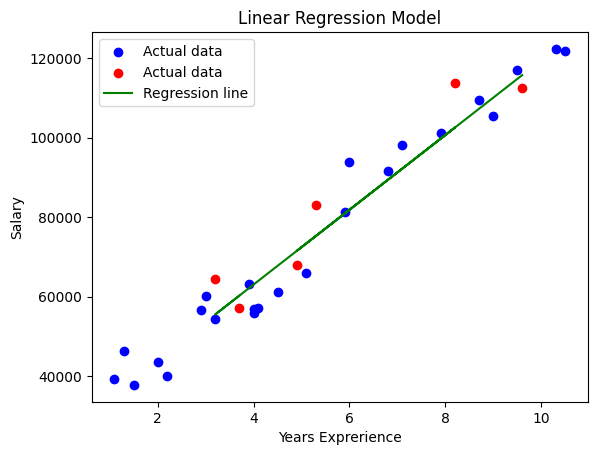

In [54]:
# visualize data train
plt.scatter(X_train, y_train, color='blue', label='Actual data')
# visualize data test
plt.scatter(X_test, y_test, color='red', label='Actual data')
# visualize model prediction
plt.plot(X_test, y_pred, color='green', label='Regression line')


plt.title('Linear Regression Model')
plt.xlabel('Years Exprerience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [55]:
# menyandingkan actual data with prediced data
df_test = pd.DataFrame(X_test, columns=['YearsExperience'])
df_test['Actual Salary'] = y_test
df_test['Predicted Salary'] = y_pred

df_test

,YearsExperience,Actual Salary,Predicted Salary
27,9.6,112635.0,115790.210113
15,4.9,67938.0,71498.278095
23,8.2,113812.0,102596.868661
17,5.3,83088.0,75267.804224
8,3.2,64445.0,55477.792045
9,3.7,57189.0,60189.699707


In [60]:
# how to input new data in our model ?
new_data = np.array([[10]])
predicted_salary = model.predict(new_data)
print(f'Predicted Salary: {predicted_salary[0]}')

Predicted Salary: 119559.73624208657


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
